## softmax
- s(y<sub>i</sub>) = <sup>e<sup>y<sub>i</sub></sup></sup>/<sub>Sum( e<sup>y<sub>i</sub></sup>)</sub>
    
- 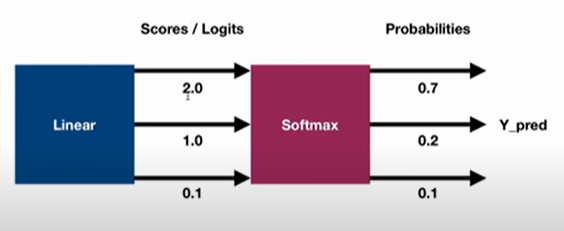

In [2]:
# softmax.py

import torch
import torch.nn as nn
import numpy as np

def softmax(x):
    return np.exp(x)/np.exp(x).sum(axis=0)

x = np.array([2.0, 1, .1])
outputs = softmax(x)

print(f'softmax numpy: {outputs}')

softmax numpy: [0.65900114 0.24243297 0.09856589]


In [3]:
x = torch.tensor([2.0, 1, .1])
outputs = torch.softmax(x, axis=0)

outputs

tensor([0.6590, 0.2424, 0.0986])

## Cross-Entropy
- D(Y<sup>^</sup>, Y) = -<sup>1</sup>/<sub>N</sub> * SUM(Y<sub>i</sub> * log(Y<sup>^</sup><sub>i</sub>)

- loss for classification problem

- high corss-entropy means bad prediction
- the y should be one hot encoded values
- the y_pred is the softmax values

In [7]:
y = np.array([1., 0, 0])
y_pred = np.array([0.7, 0.2, 0.1])

def crossentropy(y_pred, y):
    return -1 * (y * np.log(y_pred)).sum().mean()

print(f'cross entropy 1: {crossentropy(y_pred, y):.4f}')

y_pred = np.array([0.1, 0.3, 0.6])
print(f'cross entropy 2: {crossentropy(y_pred, y):.4f}')

cross entropy 1: 0.3567
cross entropy 2: 2.3026


In [9]:
loss = nn.CrossEntropyLoss()
# nn.CrossEntropyLoss = nn.LogSoftmax + nn.NLLLoss (negative log likelihood loss)
# Hence no softmax in the last layer
# y: has class labels, not one-hot encoded
# y_pred has row scores (logits), no softmax

y = torch.tensor([0, 1, 2])

y_pred_good = torch.tensor([
    [2, 0.5, 0.7],
    [0.3, 1, 0.7],
    [.2, 0.5, 0.7]
])

y_pred_bad = torch.tensor([
    [0.2, 0.5, 0.7],
    [3, 0.1, 0.7],
    [0.2, 5, 0.7]
])
# prediction size should be (n_samples x n_classes)

l1 = loss(y_pred_good, y)
l2 = loss(y_pred_bad, y)

print(f'good prediction: {l1:.4f}')
print(f'bad prediction: {l2:.4f}')

good prediction: 0.6979
bad prediction: 2.9173


## Neural network implementation (softmax layer)

In [ ]:
# multiclass problem

class NeuralNet2(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet2, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.Relu()
        slef.linear2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(x)
        out = self.linear2(x)
        # no need to add the softmax at the end
        
        return out
    
model = NeuralNet2(input_size=28*28, hidden_size=5, num_classes=3)
loss = nn.CrossEntropyLoss() # the loss applies softmax to the input

## Neural network implementation (Binary classification)

In [ ]:
# binary problem

class NeuralNet1(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNet2, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.Relu()
        slef.linear2 = nn.Linear(hidden_size, 1)
        
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(x)
        out = self.linear2(x)
        # sigmoid at the end
        out = torch.sigmoid(out)
        
        return out
    
model = NeuralNet2(input_size=28*28, hidden_size=5, num_classes=3)
loss = nn.BCELoss() # binary corssentropy for binary classification